<a href="https://colab.research.google.com/github/harshaanth/DS-Linear-Regression-Project-California-Median-Housing-Value-Prediction/blob/main/California_housing_market_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis Milestone, March 24

# Uploading the dataset from Kaggle into Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import statsmodels.api as sm

file_path = '/content/drive/My Drive/housing.csv'

df = pd.read_csv(file_path)

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0

## Parts 1 and 2

### Printing the Datatype

In [ ]:
# Printing the dtypes of the columns within our dataset
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


### Printing the na values by column

In [ ]:
# Checking the na's
print(df.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


### Printing the Unique Values per Column

In [ ]:
# Getting the unique values from each column
print(df.nunique())

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64


### Printing the Statistical Summary

In [ ]:
# Running the statistical summary

# include='all' command is allowing for the categorical variable to be shown as well
print(df.describe(include='all'))

           longitude      latitude  housing_median_age   total_rooms  \
count   20640.000000  20640.000000        20640.000000  20640.000000   
unique           NaN           NaN                 NaN           NaN   
top              NaN           NaN                 NaN           NaN   
freq             NaN           NaN                 NaN           NaN   
mean     -119.569704     35.631861           28.639486   2635.763081   
std         2.003532      2.135952           12.585558   2181.615252   
min      -124.350000     32.540000            1.000000      2.000000   
25%      -121.800000     33.930000           18.000000   1447.750000   
50%      -118.490000     34.260000           29.000000   2127.000000   
75%      -118.010000     37.710000           37.000000   3148.000000   
max      -114.310000     41.950000           52.000000  39320.000000   

        total_bedrooms    population    households  median_income  \
count     20433.000000  20640.000000  20640.000000   20640.000000 

Histograms of all quantitative variables

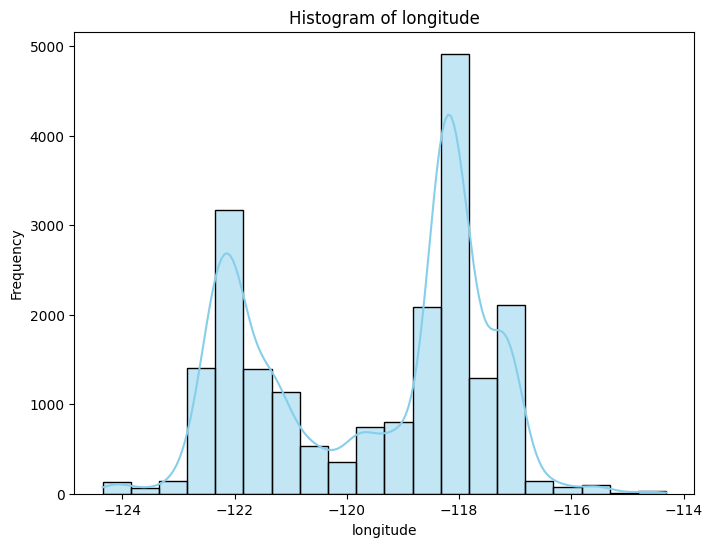

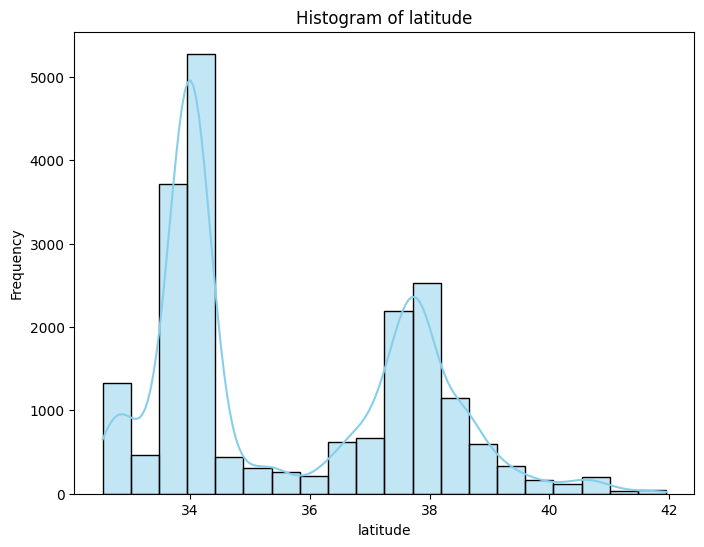

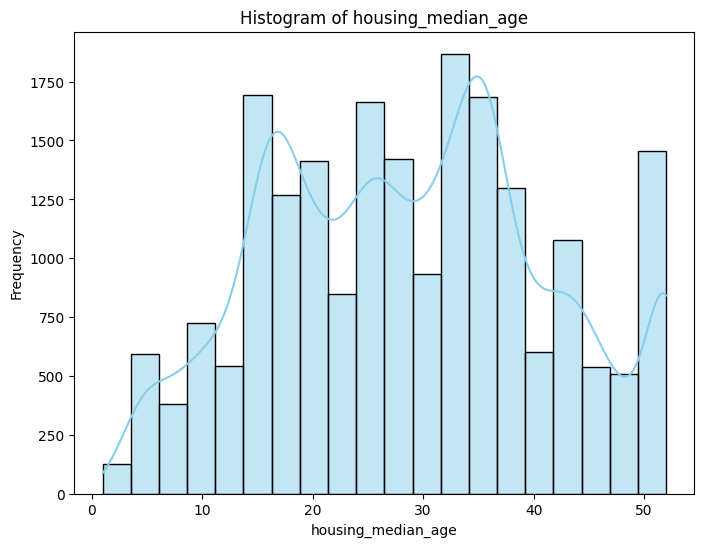

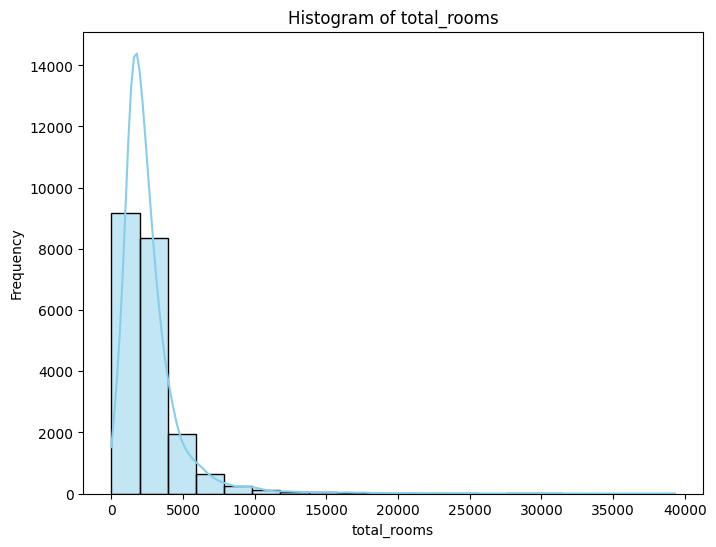

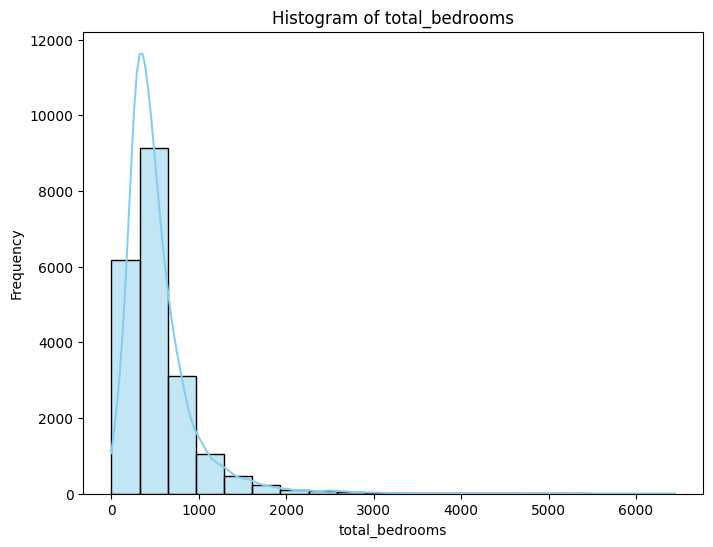

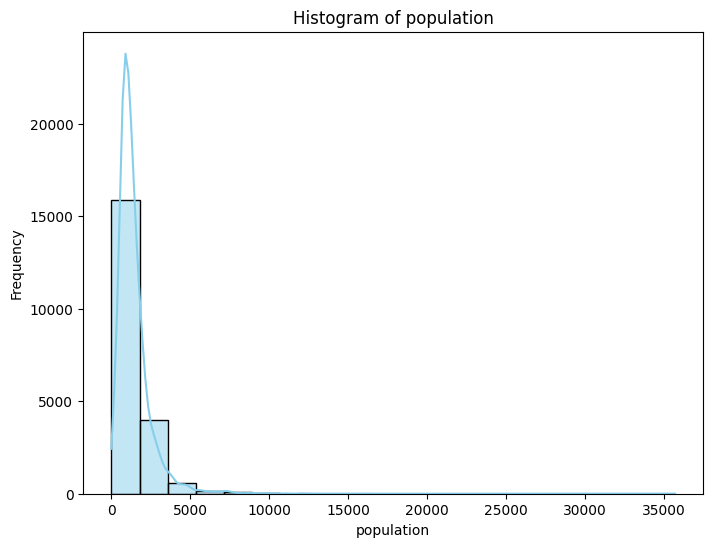

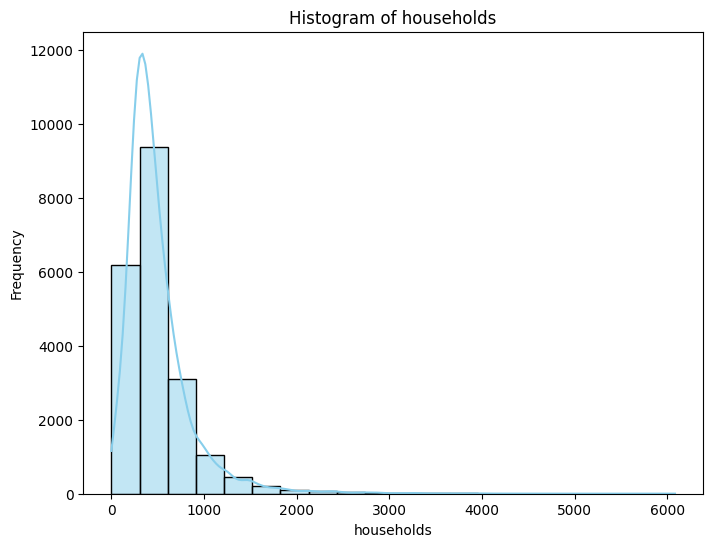

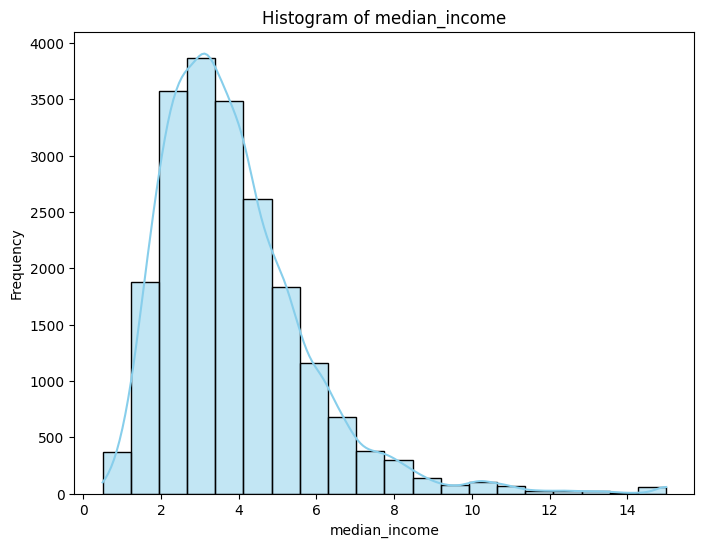

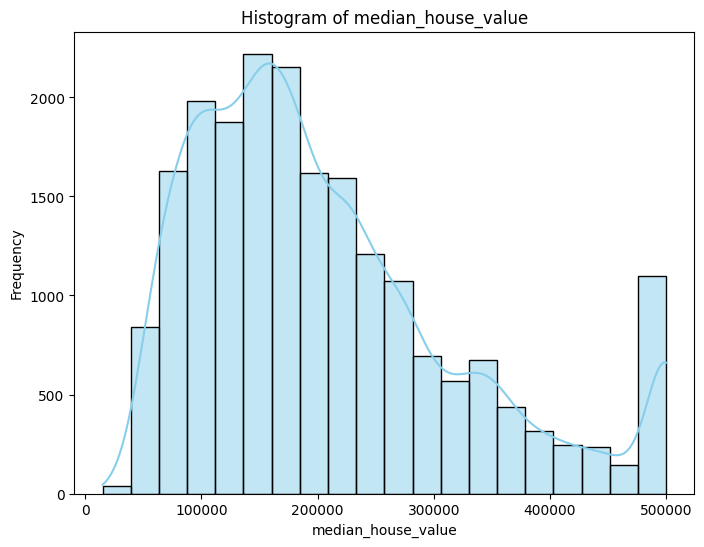

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of quantitative variables
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Create histograms
for var in quantitative_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

Visualization for each categorical variable

<ipython-input-29-81e4658f4cdd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette='viridis')


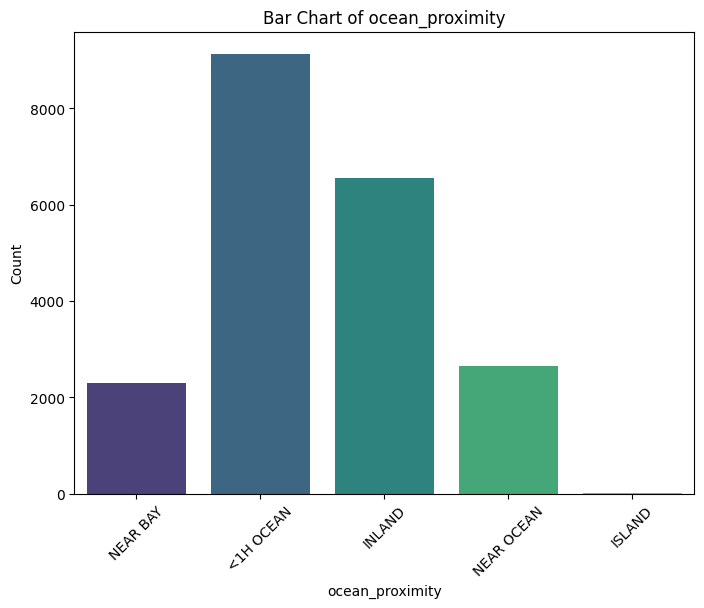

In [ ]:
# List of categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns

# Create bar charts
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, data=df, palette='viridis')
    plt.title(f'Bar Chart of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Handling missing values:
we'll use mean imputation for quantitative variables, and mode imputation for categorical variables

In [ ]:
# Impute missing values for quantitative variables with mean
for var in quantitative_vars:
    df[var].fillna(df[var].mean(), inplace=True)

# Impute missing values for categorical variables with mode
for var in categorical_vars:
    df[var].fillna(df[var].mode()[0], inplace=True)

# Check if there are any remaining missing values
print(df.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Project Pre-Processing Milestone, March 31

## Convert ordinal variables to numerical

In [ ]:
ordinal_vars = {'<1H OCEAN': 1, 'INLAND': 2, 'ISLAND': 3, 'NEAR BAY': 4, 'NEAR OCEAN': 5}
df['ocean_proximity'] = df['ocean_proximity'].map(ordinal_vars)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                4  
1      2401.0      1138.0         8.3014            358500.0                4  
2       496.0       177.0         7.2574            352100.0                4  
3       558.0       219.0         5.6431            341300.0                4  
4       565.0       259.0         3.8462            342200.0                4  


Correlation Analysis

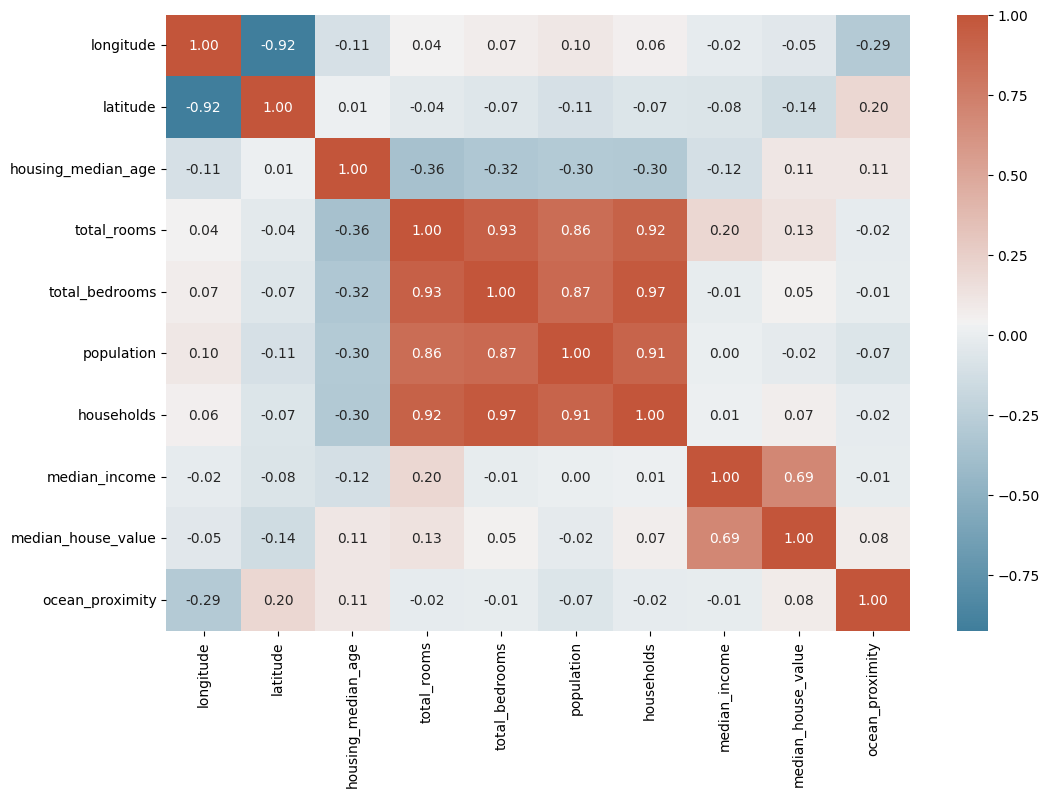

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr=df.corr()
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap=cmap)
plt.show()

Looking at the plot above for correlation analysis, we can see that there are some columns that are highly correlated. Those would be:
- total_bedrooms and total_rooms
- households and total_rooms
- households and total_bedrooms
- households and population
- population and total_bedrooms

Dropping Columns that are highly correlated

In [ ]:
# df = df.drop(['total_rooms', 'population'], axis=1)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  ocean_proximity  
0       322.0       126.0         8.3252            452600.0                4  
1      2401.0      1138.0         8.3014            358500.0                4  
2       496.0       177.0         7.2574            352100.0                4  
3       558.0       219.0         5.6431            341300.0                4  
4       565.0       259.0         3.8462            342200.0                4  


Scatterplots

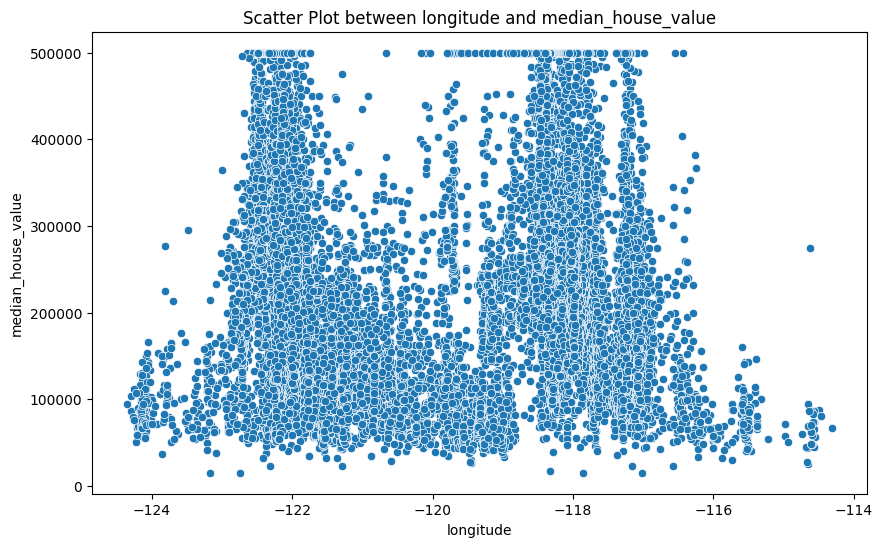

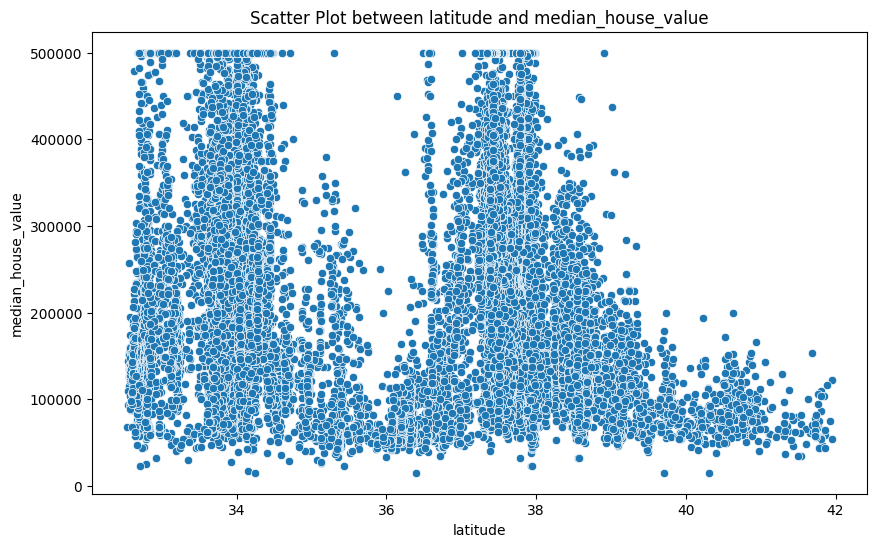

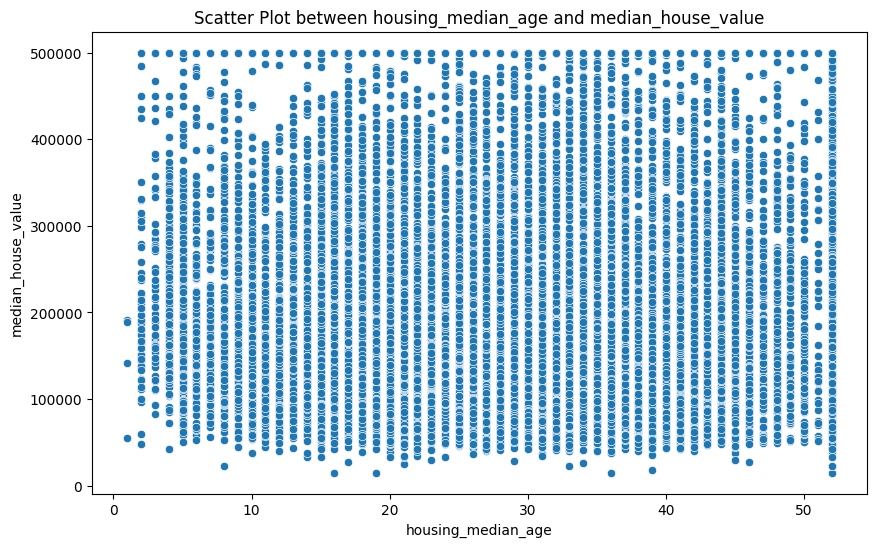

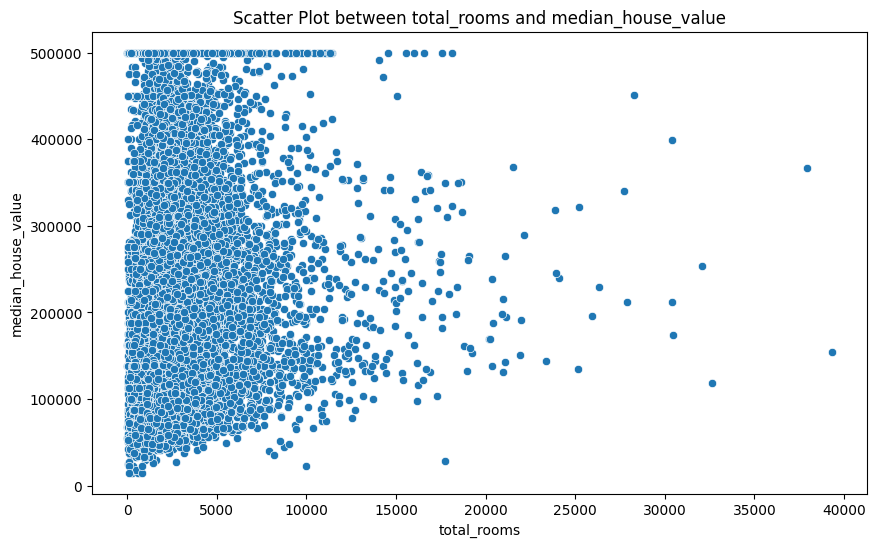

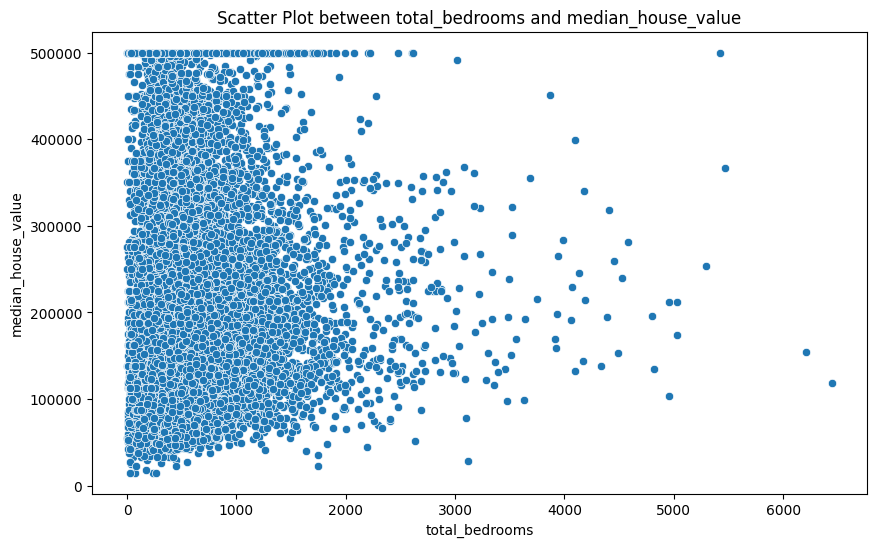

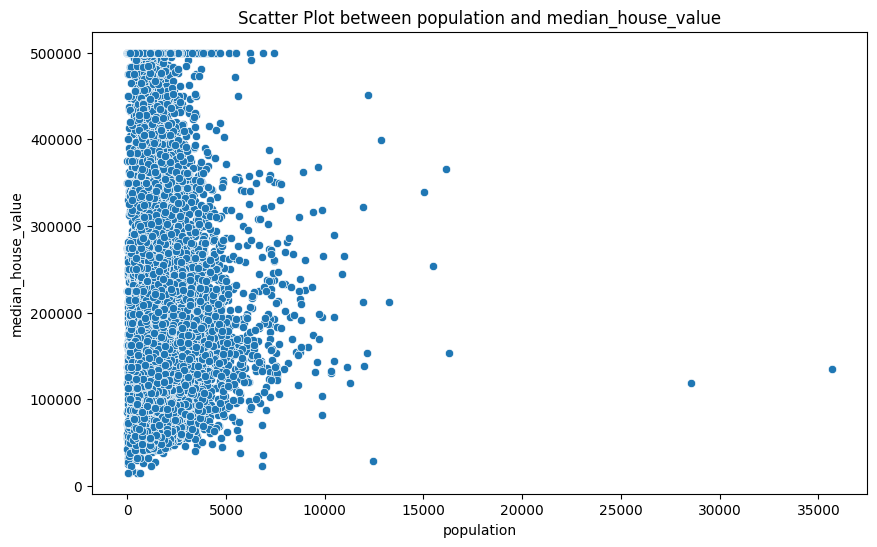

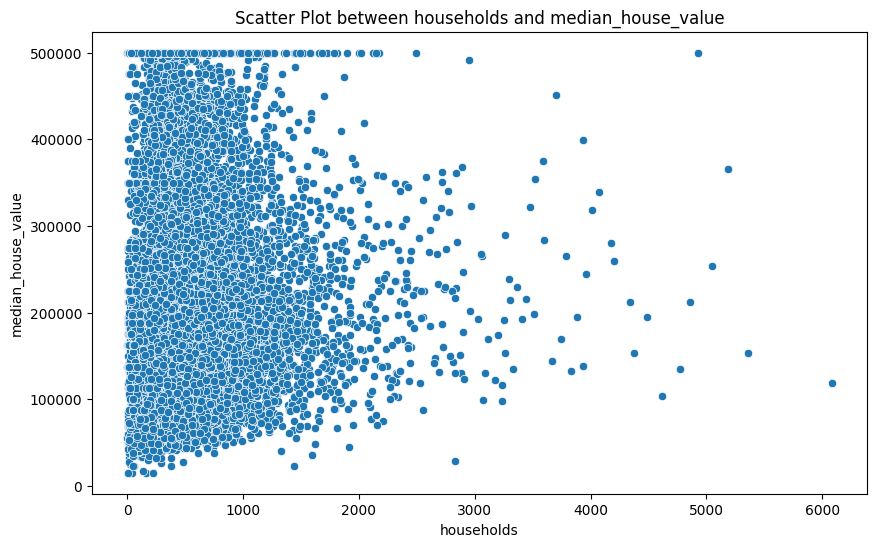

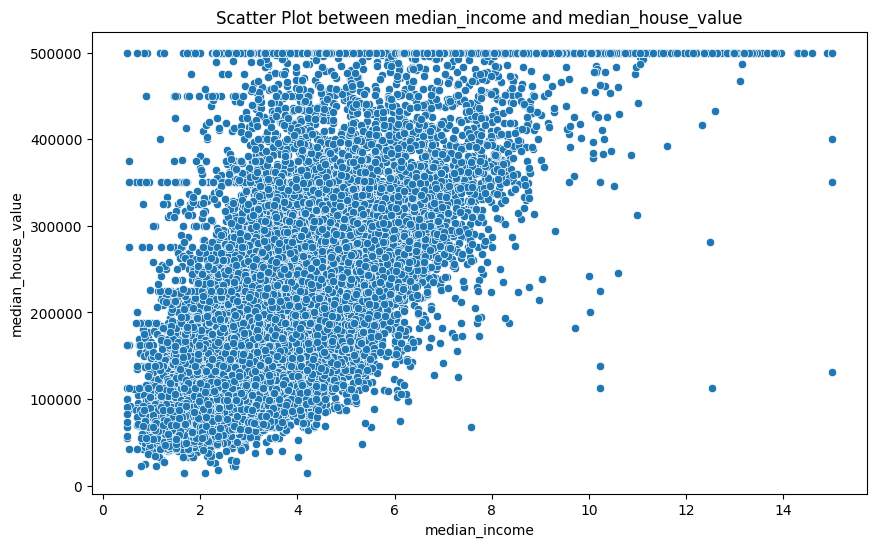

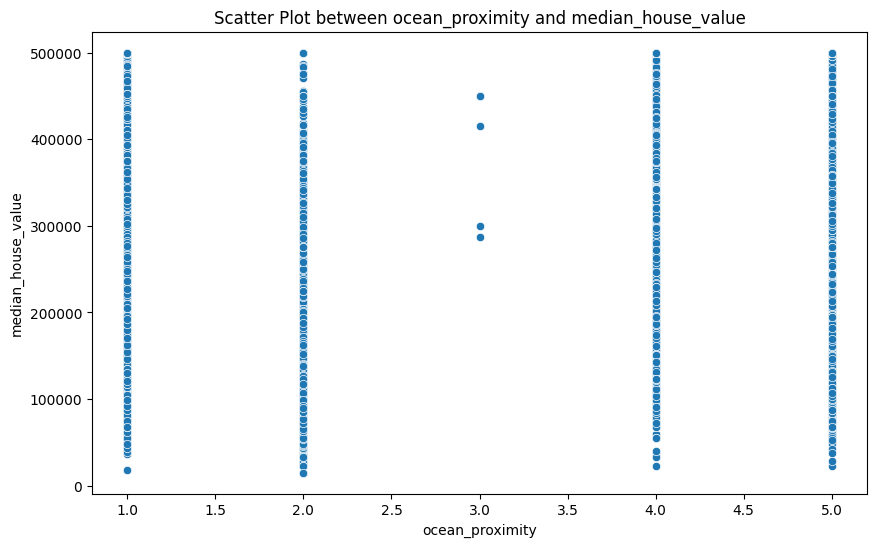

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of quantitative variables
quantitative_vars = df.select_dtypes(include=['int64', 'float64']).columns

# Target Variable
target_var = 'median_house_value'

# Scatterplots in For Loop
for var in quantitative_vars:
    if var != target_var:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[var], y=df[target_var])
        plt.title(f'Scatter Plot between {var} and {target_var}')
        plt.xlabel(var)
        plt.ylabel(target_var)

Whilst we see variables that could be interpreted as an outlier, we must recognize that our data is considering about housing prices and as such there are going to be differences within the median house values and the variables we considered above

Scaling the Target Variable

<Axes: xlabel='median_house_value', ylabel='Count'>

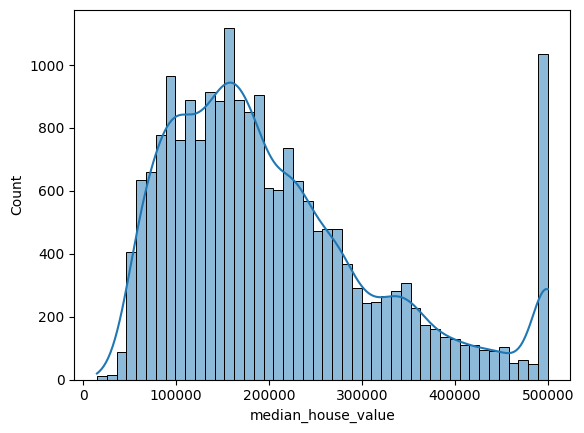

In [ ]:
sns.histplot(data=df, x='median_house_value', kde = True)

In [ ]:
df['median_house_value_log'] = np.log(df['median_house_value'])

<Axes: xlabel='median_house_value_log', ylabel='Count'>

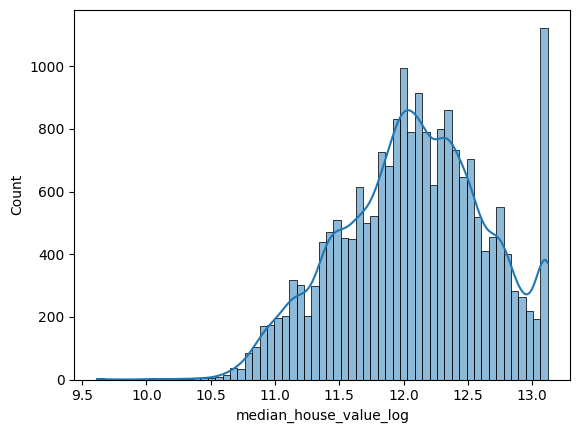

In [ ]:
sns.histplot(data=df, x='median_house_value_log', kde = True)

Given that our target variable was skewed, we went ahead and added the transformation

Scaling Predictor Variables

In [ ]:
# Scaling predictor variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[quantitative_vars] = scaler.fit_transform(df[quantitative_vars])

Splitting Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

y = df['median_house_value_log']
X = df.drop(columns = {'median_house_value', 'median_house_value_log'})

# add the intercept term
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   latitude            20640 non-null  float64
 3   housing_median_age  20640 non-null  float64
 4   total_rooms         20640 non-null  float64
 5   total_bedrooms      20640 non-null  float64
 6   population          20640 non-null  float64
 7   households          20640 non-null  float64
 8   median_income       20640 non-null  float64
 9   ocean_proximity     20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB
None


In [ ]:
print(y_train.info())
print(X_train.info())

<class 'pandas.core.series.Series'>
Index: 16512 entries, 14196 to 15795
Series name: median_house_value_log
Non-Null Count  Dtype  
--------------  -----  
16512 non-null  float64
dtypes: float64(1)
memory usage: 258.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               16512 non-null  float64
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16512 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   ocean_proximity     16512 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB
None


In [ ]:
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: median_house_value_log
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB
None


# Model Fit and Initial Evaluation - April 7th Milestone

Check for Multicollinearity
We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

              feature        VIF
0               const   1.000131
1           longitude   9.384069
2            latitude   9.145178
3  housing_median_age   1.259551
4         total_rooms  12.893246
5      total_bedrooms  36.324423
6          population   6.424037
7          households  35.840621
8       median_income   1.755530
9     ocean_proximity   1.157250


Drop the column 'TAX' from the training data and check if multicollinearity is removed?

In [ ]:
# create the model after dropping the columns with VIF > 5
X_train = X_train.drop(columns=['longitude', 'latitude', 'total_rooms', 'total_bedrooms', 'population', 'households'], axis = 1) #Write your code here

# check for VIF
print(checking_vif(X_train))

              feature       VIF
0               const  1.000051
1  housing_median_age  1.028072
2       median_income  1.015042
3     ocean_proximity  1.013111


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

Write the code to create the linear regression model using statsmodels OLS and print the model summary. Write your observations from the model.

In [ ]:
# create the model fit
model1 = sm.OLS(y_train,X_train).fit()

In [ ]:
# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_house_value_log   R-squared:                       0.463
Model:                                OLS   Adj. R-squared:                  0.463
Method:                     Least Squares   F-statistic:                     4742.
Date:                    Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                            16:04:57   Log-Likelihood:                -8986.3
No. Observations:                   16512   AIC:                         1.798e+04
Df Residuals:                       16508   BIC:                         1.801e+04
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0848      0.003   3723.549      0.000      12.078      12.091
housing_median_age     0.0858      0.003     26.106      0.000       0.079       0.092
median_income          0.3859      0.003    118.313      0.000       0.380       0.392
ocean_proximity        0.0268      0.003      8.181      0.000       0.020       0.033
==============================================================================
Omnibus:                      187.481   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.662
Skew:                          -0.065   Prob(JB):                     4.70e-69
Kurtosis:                       3.664   Cond. No.                         1.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
import numpy as np

kf = KFold(n_splits=5)

r2_scores = []
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    model = sm.OLS(y_train_fold, X_train_fold).fit()
    y_pred = model.predict(X_test_fold)
    r2_scores.append(r2_score(y_test_fold, y_pred))

average_r2 = np.mean(r2_scores)

print(f"\nAverage R2 Score: {average_r2}")


Average R2 Score: 0.4625079169787787


From the model, we can see that it has an adjusted R2 value of 0.704 which means that 70.4% of the data is explained by the model fit.

All 3 variables that we found using the vif were significant given that the p-value for them are all very low and under the threshold of 0.05.

With the median_age variable we see that it's a negative value which means that as the house age goes up, the house price decreases

The income and proximity are both positive meaning that as it goes up, so does the price of the home

# Model Refinements and Additional Evaluation - April 21

### Linear Regression

#### Check the performance of the model on the train and test data

#### Get the model coefficients and write the equation of the linear regression model

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

y = df['median_house_value_log']
X = df.drop(columns = {'median_house_value', 'median_house_value_log'})

# add the intercept term
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create the model fit
model = sm.OLS(y_train,X_train).fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     median_house_value_log   R-squared:                       0.648
Model:                                OLS   Adj. R-squared:                  0.647
Method:                     Least Squares   F-statistic:                     3369.
Date:                    Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                            15:49:31   Log-Likelihood:                -5507.4
No. Observations:                   16512   AIC:                         1.103e+04
Df Residuals:                       16502   BIC:                         1.111e+04
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.0843      0.003   4595.625      0.000      12.079      12.089
longitude             -0.5670      0.008    -70.463      0.000      -0.583      -0.551
latitude              -0.6072      0.008    -76.383      0.000      -0.623      -0.592
housing_median_age     0.0431      0.003     14.626      0.000       0.037       0.049
total_rooms           -0.0640      0.009     -6.759      0.000      -0.083      -0.045
total_bedrooms         0.2033      0.016     12.822      0.000       0.172       0.234
population            -0.2023      0.007    -30.485      0.000      -0.215      -0.189
households             0.0977      0.016      6.183      0.000       0.067       0.129
median_income          0.3380      0.003     97.248      0.000       0.331       0.345
ocean_proximity       -0.0214      0.003     -7.532      0.000      -0.027      -0.016
==============================================================================
Omnibus:                      939.766   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3921.053
Skew:                           0.070   Prob(JB):                         0.00
Kurtosis:                       5.383   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.compat import lzip


model = LinearRegression()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

print("R-squared (Train):", model.score(X_train, y_train))
print("R-squared (Test):", model.score(X_test, y_test))

Mean Squared Error (Train): 0.11408614456895066
Mean Squared Error (Test): 0.12240589982017168
R-squared (Train): 0.6475761341311297
R-squared (Test): 0.6228626863599358


### This model has pretty poor scores so we will try and use A Decision Tree to help judge the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

print("R-squared (Train):", model.score(X_train, y_train))
print("R-squared (Test):", model.score(X_test, y_test))

Mean Squared Error (Train): 6.554730874292806e-32
Mean Squared Error (Test): 0.1063673071985437
R-squared (Train): 1.0
R-squared (Test): 0.672278210814022


### This model performed better in the score on first glance but looking at the results, we can see that it suffers from overfitting so we won't use these values

#### Mean of Residuals

In [ ]:
model = sm.OLS(y_train,X_train).fit()

residuals = model.resid
mResid = np.mean(residuals)
print("Residuals: ", mResid)

Residuals:  1.6984691000757724e-15


#### Heteroscedasticity

In [ ]:
import statsmodels.stats.api as sms

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
vals = sms.het_breuschpagan(residuals, sm.add_constant(X_train))
lzip(name, vals)

[('Lagrange multiplier statistic', 720.424133999694),
 ('p-value', 2.8081817535519996e-149),
 ('f-value', 83.64824919693116),
 ('f p-value', 1.0696746065655502e-152)]

#### Linearity of variables

In [ ]:
rainbow_statistic, p_value_linearity = sm.stats.diagnostic.linear_rainbow(model)

print(p_value_linearity)

6.768272887454895e-06


#### Normality of error terms

In [ ]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
vals = sm.stats.stattools.jarque_bera(residuals)

lzip(name, vals)

[('Jarque-Bera', 3921.052637709906),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', 0.0695930945305426),
 ('Kurtosis', 5.383239731972148)]